# Mašinsko učenje
# Projekat 3 - Veštačke neuronske mreže
# Nikola Vukotić 1401, Željko Balanović 1533¶
## Prognoza vrste raka dojke
### Dataset: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?select=breast-cancer.csv

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold
import tensorflow.keras.backend as kb
from imblearn.over_sampling import SMOTE

In [143]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [145]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: >

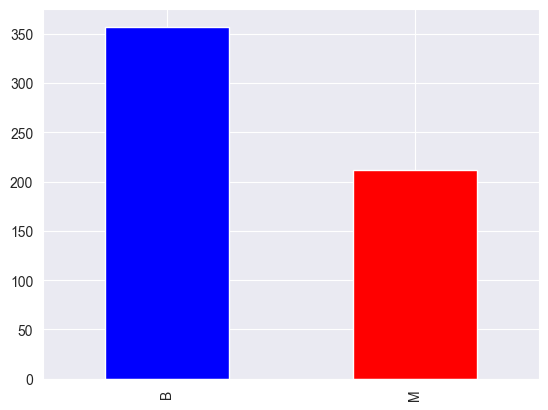

In [146]:
df.diagnosis.value_counts().plot(kind="bar", color=['blue', 'red'])

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [148]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [149]:
df = df.drop(columns=['id'])

In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


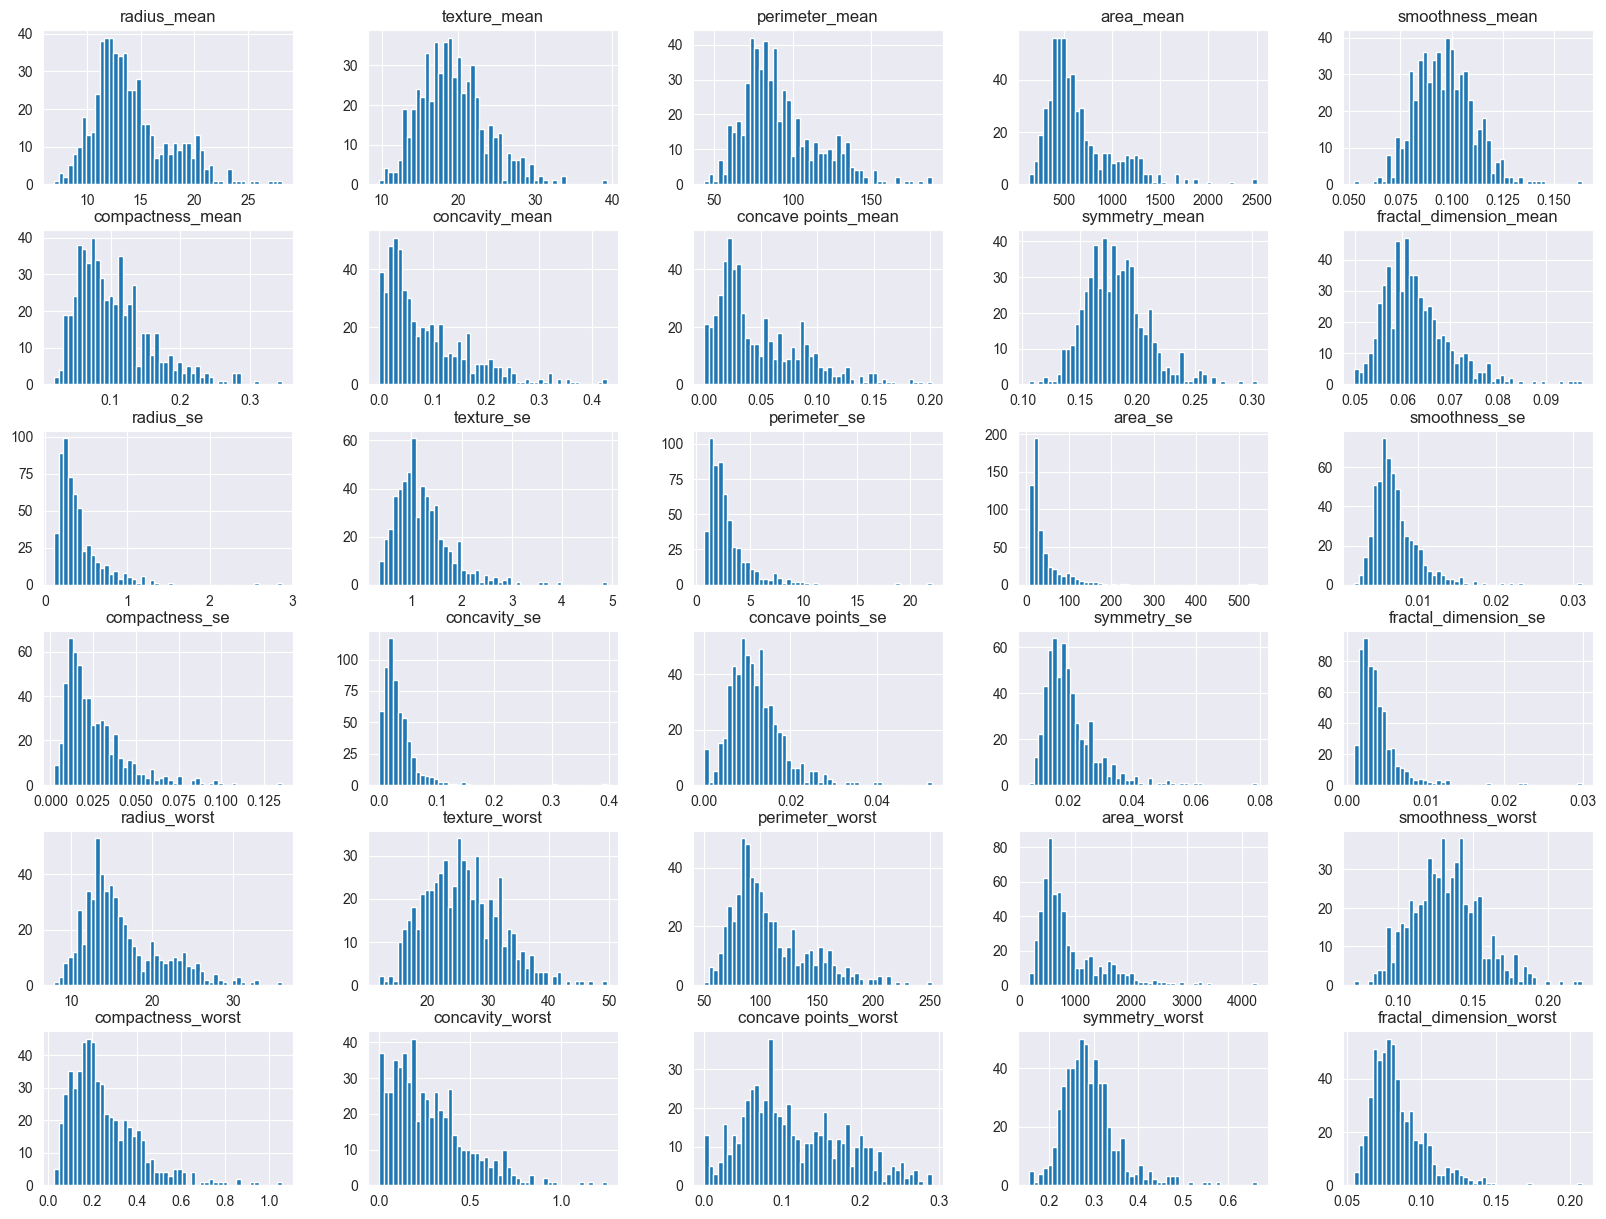

In [151]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

/var/folders/w9/1yzd3jfs0s18rk7_92qw2ctm0000gp/T/ipykernel_68676/2831401779.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


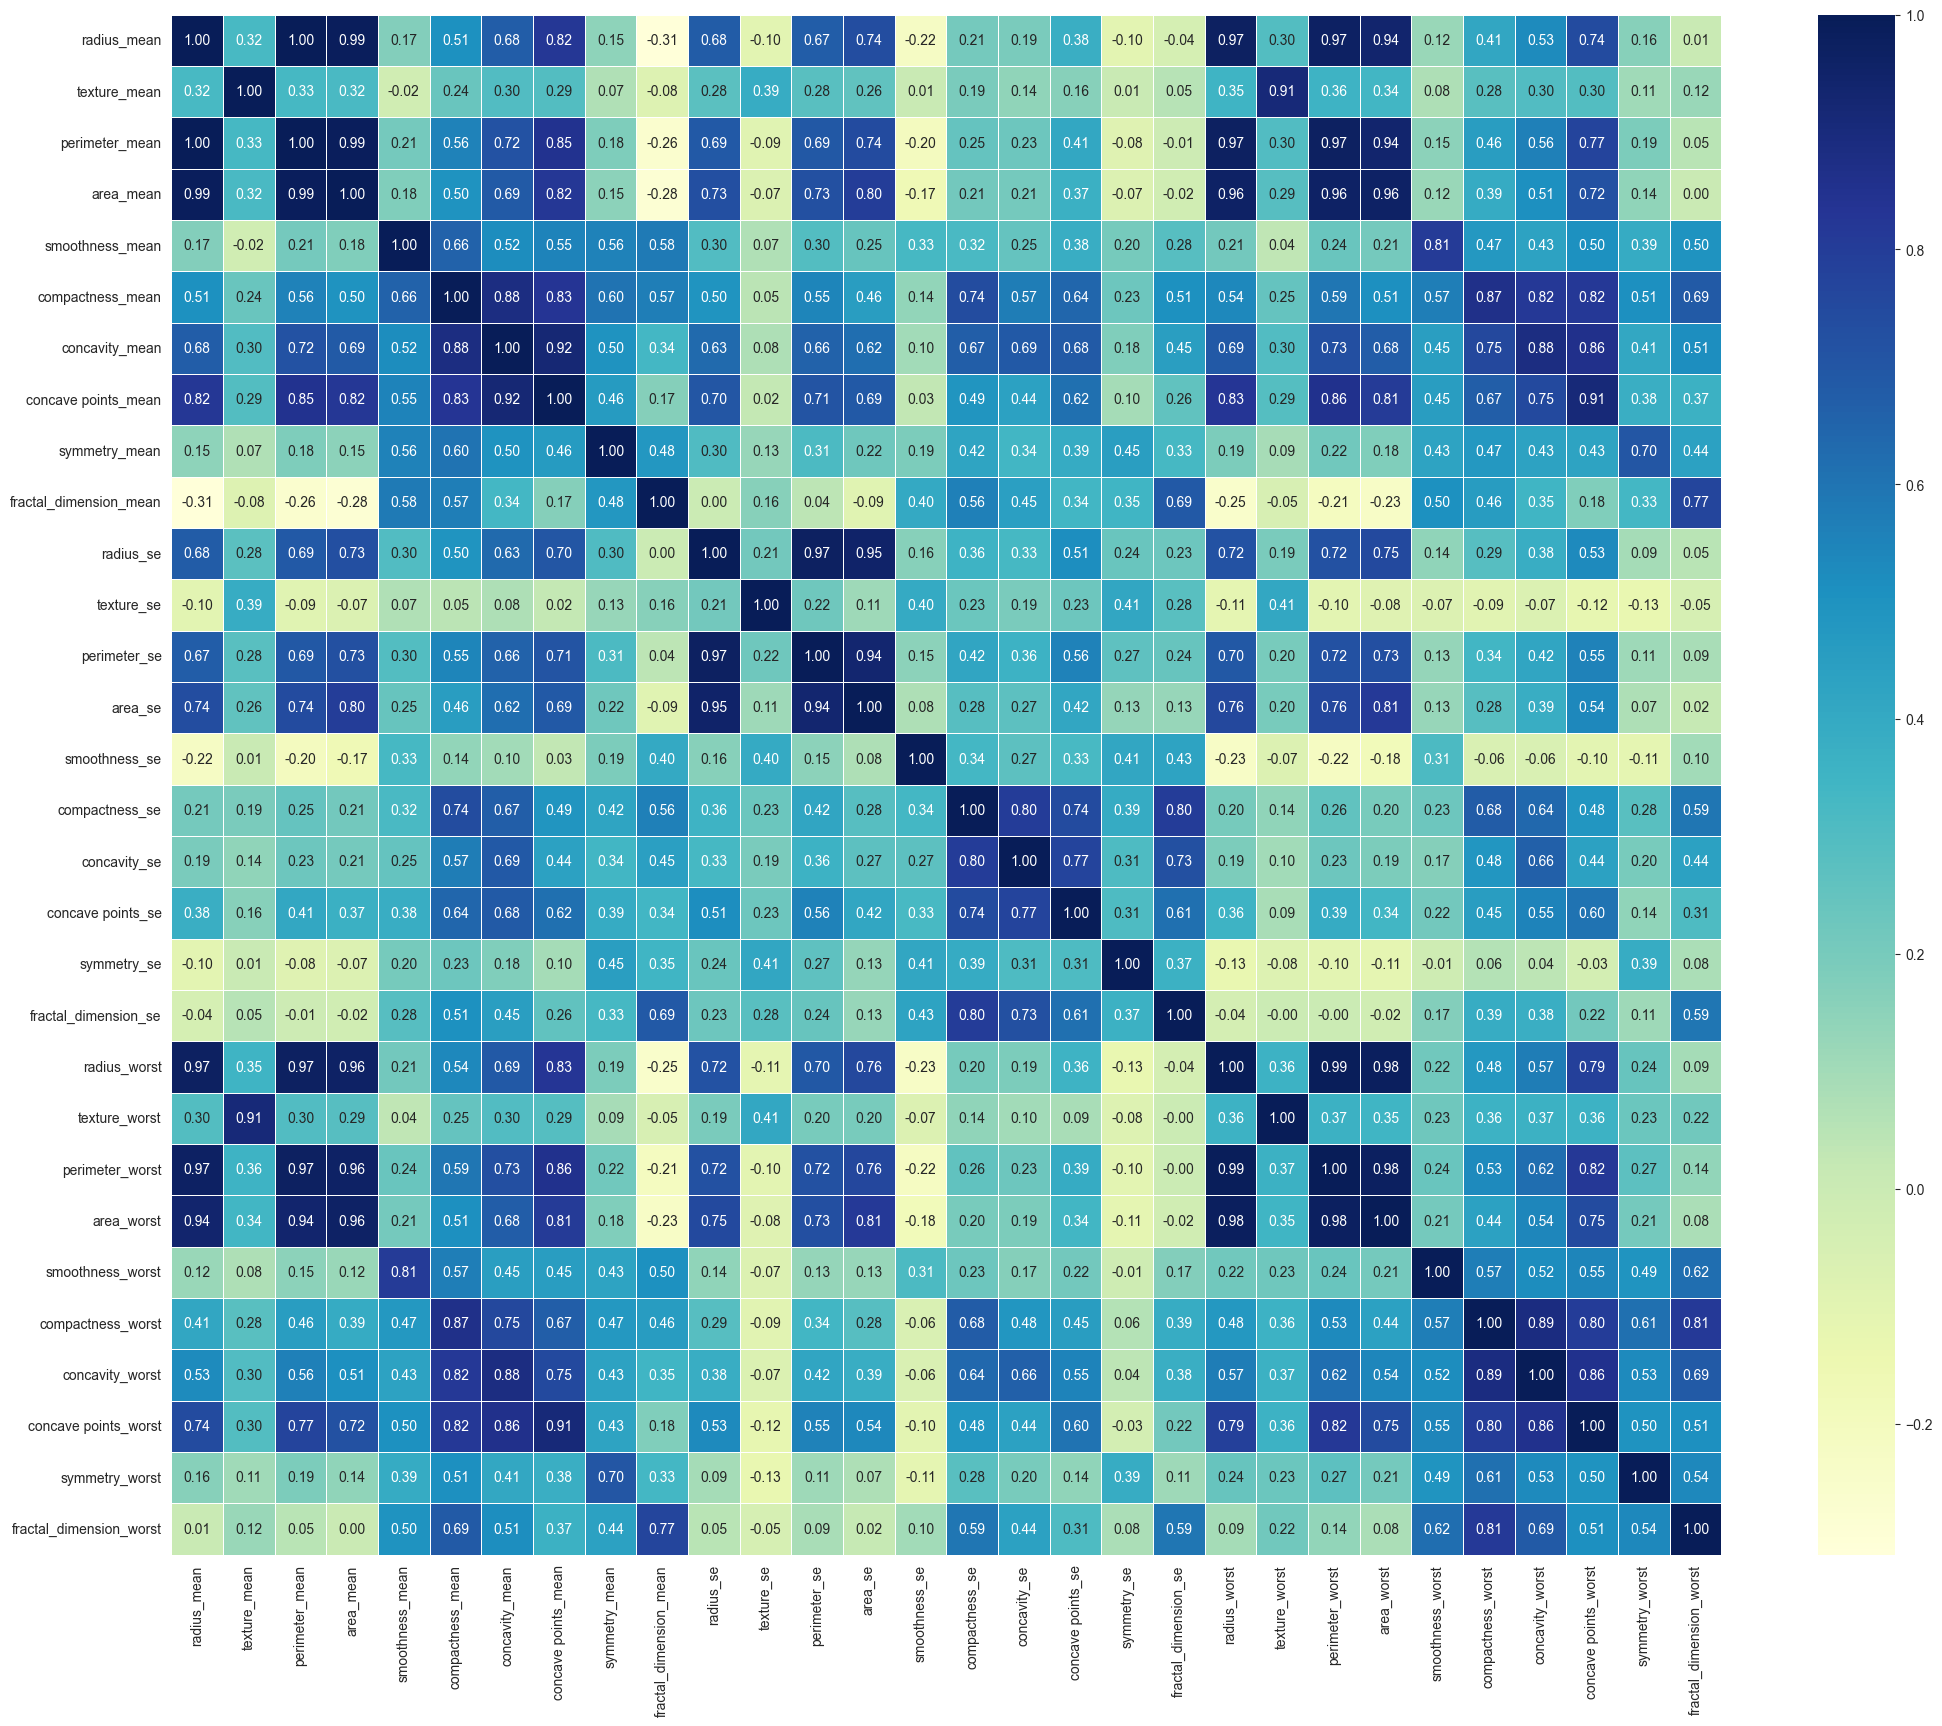

In [152]:
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap='YlGnBu')

## Data preprocessing

In [153]:
X = df.drop(columns='diagnosis')
y = df.diagnosis

In [154]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [155]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [156]:
X = X.iloc[:,:].values
y = y.iloc[:].values

In [157]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [158]:
y[:20]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B'], dtype=object)

In [159]:
for i in range(len(y)):
  if (y[i] == 'M'):
    y[i] = 1
  else:
    y[i] = 0

In [160]:
y[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=object)

### Podela dataseta u trening i test

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
print('Num of train instances:', len(X_train))
print('Num of test instances:', len(X_test))

Num of train instances: 455
Num of test instances: 114


### Feature scaling

In [163]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [164]:
def get_pred_labels(ann, X_test):
  y_pred = ann.predict(X_test)
  for i in range(len(y_pred)):
    y_pred[i] = 1 if (y_pred[i] > 0.5) else 0
  y_pred = np.concatenate(y_pred, axis=0).astype(int)
  return y_pred


def show_conf_matrix(y_pred):
  cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
  plt.figure()
  plot_confusion_matrix(cm, figsize=(10,6), hide_ticks=True, cmap=plt.cm.Blues)
  plt.xticks(range(2), ['Benign', 'Malignant'], fontsize=16)
  plt.yticks(range(2), ['Benign', 'Malignant'], fontsize=16)
  plt.show()

### Rucno menjanje learning rate-a po clanku [1]
### Po clanku [1] su isprobani razliciti oprimiser-i


[1] Jason Brownlee PhD, https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

## 1. ANNS USING Adam optimiser

### ANN1

In [165]:
ann1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [166]:
ann1.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [167]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)

In [168]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [169]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist = ann1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 626us/step - loss: 0.6443 - accuracy: 0.5516
Epoch 2/100
15/15 [==============================] - 0s 621us/step - loss: 0.4447 - accuracy: 0.8989
Epoch 3/100
15/15 [==============================] - 0s 624us/step - loss: 0.3112 - accuracy: 0.9429
Epoch 4/100
15/15 [==============================] - 0s 538us/step - loss: 0.2229 - accuracy: 0.9473
Epoch 5/100
15/15 [==============================] - 0s 590us/step - loss: 0.1720 - accuracy: 0.9538
Epoch 6/100
15/15 [==============================] - 0s 483us/step - loss: 0.1405 - accuracy: 0.9626
Epoch 7/100
15/15 [==============================] - 0s 433us/step - loss: 0.1186 - accuracy: 0.9670
Epoch 8/100
15/15 [==============================] - 0s 398us/step - loss: 0.1028 - accuracy: 0.9736
Epoch 9/100
15/15 [==============================] - 0s 403us/step - loss: 0.0920 - accuracy: 0.9758
Epoch 10/100
15/15 [==============================] - 0s 446us/step - loss: 0.0842 - accura

### Evaluating ANN1

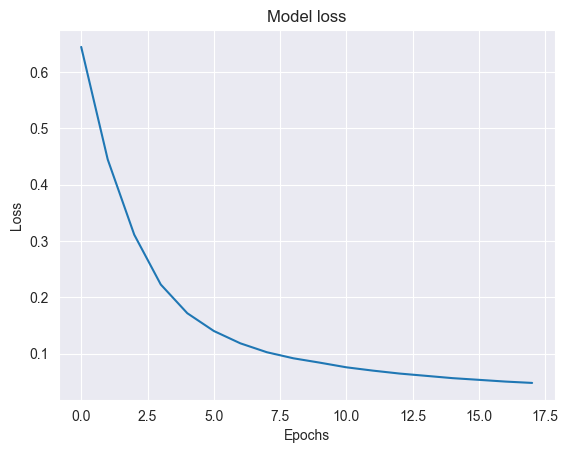

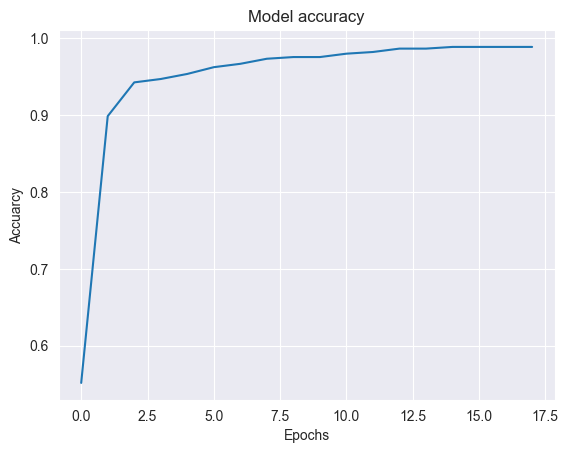

In [170]:
plt.plot(ann1_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [171]:
y_pred = get_pred_labels(ann1, X_test)

4/4 [==============================] - 0s 1ms/step


In [172]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

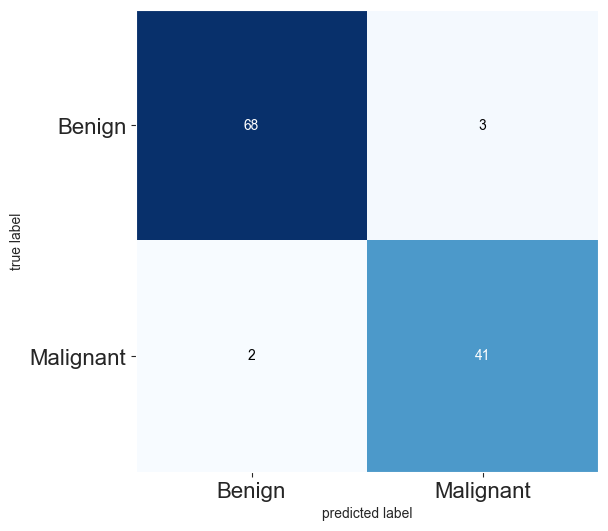

In [173]:
show_conf_matrix(y_pred)

In [174]:
acc1 = accuracy_score(y_test.astype(int), y_pred.astype(int))
acc1

0.956140350877193

In [175]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## ANN2 

In [176]:
ann2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [177]:
ann2.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [178]:
ann2_hist = ann2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 686us/step - loss: 0.6391 - accuracy: 0.6835
Epoch 2/100
15/15 [==============================] - 0s 534us/step - loss: 0.4946 - accuracy: 0.8440
Epoch 3/100
15/15 [==============================] - 0s 550us/step - loss: 0.3868 - accuracy: 0.8945
Epoch 4/100
15/15 [==============================] - 0s 527us/step - loss: 0.3085 - accuracy: 0.9121
Epoch 5/100
15/15 [==============================] - 0s 523us/step - loss: 0.2461 - accuracy: 0.9275
Epoch 6/100
15/15 [==============================] - 0s 504us/step - loss: 0.2037 - accuracy: 0.9407
Epoch 7/100
15/15 [==============================] - 0s 480us/step - loss: 0.1803 - accuracy: 0.9516
Epoch 8/100
15/15 [==============================] - 0s 439us/step - loss: 0.1638 - accuracy: 0.9473
Epoch 9/100
15/15 [==============================] - 0s 493us/step - loss: 0.1376 - accuracy: 0.9582
Epoch 10/100
15/15 [==============================] - 0s 503us/step - loss: 0.1138 - accura

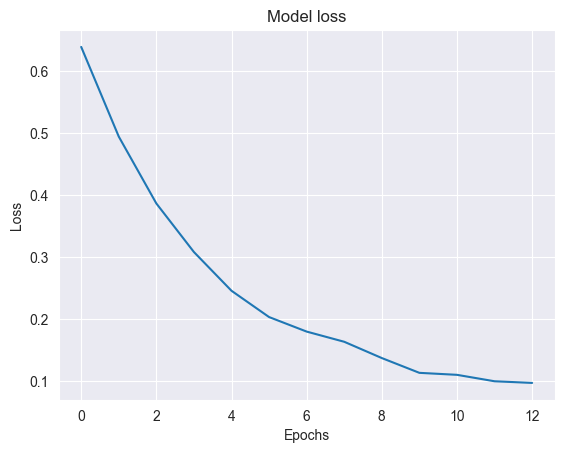

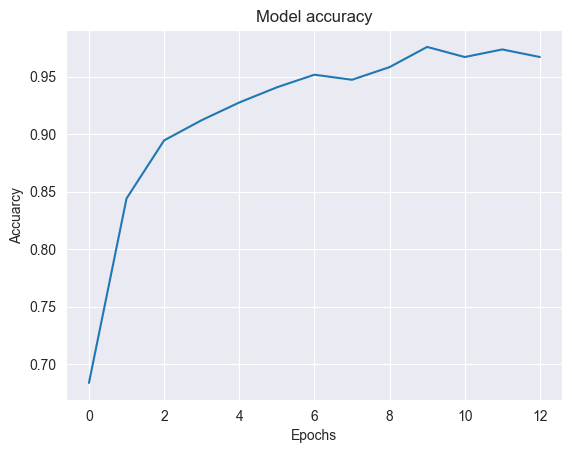

In [179]:
plt.plot(ann2_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [180]:
y_pred2 = get_pred_labels(ann2, X_test)

4/4 [==============================] - 0s 796us/step


<Figure size 640x480 with 0 Axes>

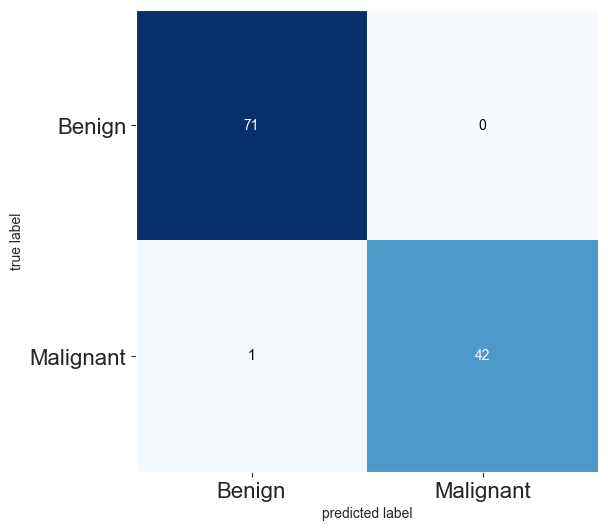

In [181]:
show_conf_matrix(y_pred2)

In [182]:
acc2 = accuracy_score(y_test.astype(int), y_pred2.astype(int))
acc2

0.9912280701754386

In [183]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## ANN3

In [184]:
ann3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [185]:
ann3.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [186]:
ann3_hist = ann3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.5845 - accuracy: 0.8791
Epoch 2/100
15/15 [==============================] - 0s 911us/step - loss: 0.3381 - accuracy: 0.9297
Epoch 3/100
15/15 [==============================] - 0s 692us/step - loss: 0.1867 - accuracy: 0.9429
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9626
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9714
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9736
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9736
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9758
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9802
Epoch 10/100
15/15 [==============================] - 0s 803us/step - loss: 0.0482 - accuracy: 0.9802
Epo

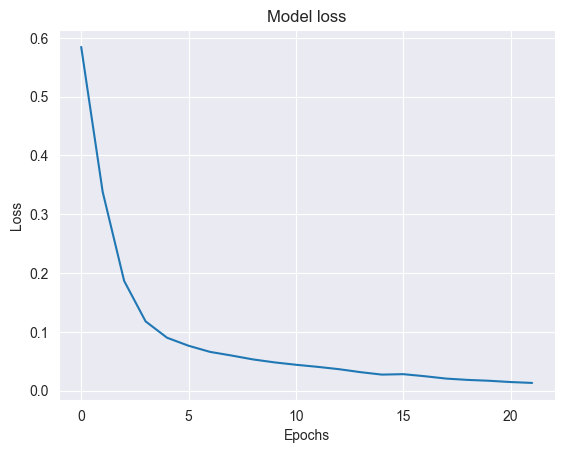

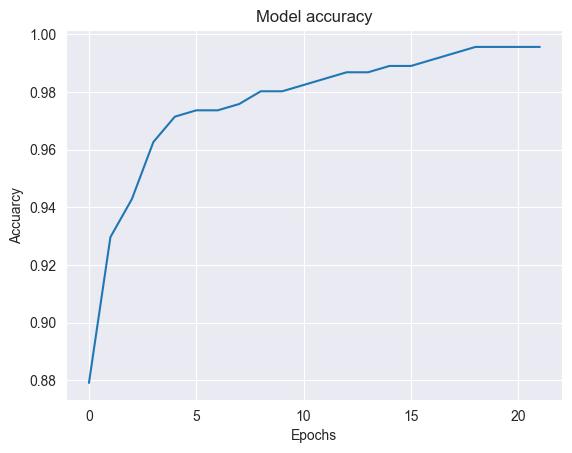

In [187]:
plt.plot(ann3_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [188]:
y_pred3 = get_pred_labels(ann3, X_test)

4/4 [==============================] - 0s 838us/step


<Figure size 640x480 with 0 Axes>

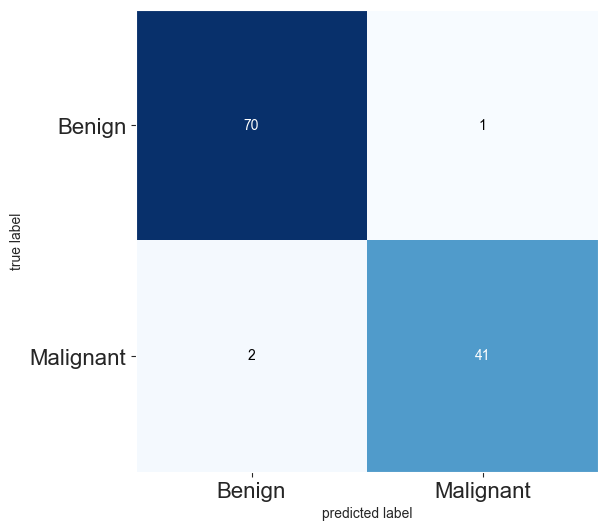

In [189]:
show_conf_matrix(y_pred3)

In [190]:
acc3 = accuracy_score(y_test.astype(int), y_pred3.astype(int))
acc3

0.9736842105263158

In [191]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



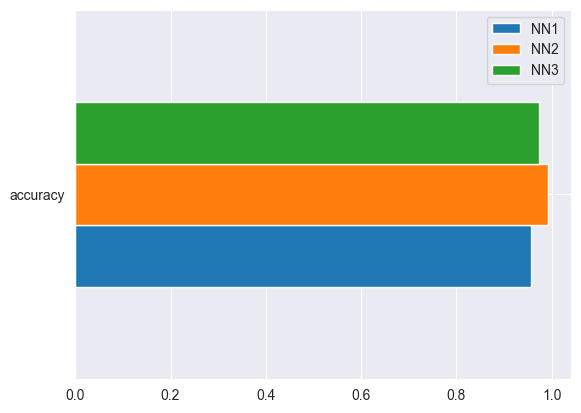

In [192]:
model_scores = {
    'NN1': acc1,
    'NN2': acc2,
    'NN3': acc3
}
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot(kind='barh',);

### Da li uraditi upsampling?
### Da li je okej posto ima manje podataka? Ideja je da se vidi da li ANN mogu da daju dobre rezultate sa malo podataka.
### Probati sa drugim loss funkcijama?
### Upsampling undersampling problemi ? koje algoritme koristiti za to?

## 2. ANNS Using "Adagrad" Optimiser

## ANN1 Adagrad

In [193]:
ann1_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [194]:
ann1_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [195]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)


In [196]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist_adagrad = ann1_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 652us/step - loss: 0.7789 - accuracy: 0.4000
Epoch 2/100
15/15 [==============================] - 0s 497us/step - loss: 0.7420 - accuracy: 0.4659
Epoch 3/100
15/15 [==============================] - 0s 465us/step - loss: 0.7127 - accuracy: 0.5231
Epoch 4/100
15/15 [==============================] - 0s 456us/step - loss: 0.6880 - accuracy: 0.5582
Epoch 5/100
15/15 [==============================] - 0s 518us/step - loss: 0.6652 - accuracy: 0.6044
Epoch 6/100
15/15 [==============================] - 0s 473us/step - loss: 0.6457 - accuracy: 0.6484
Epoch 7/100
15/15 [==============================] - 0s 485us/step - loss: 0.6279 - accuracy: 0.6791
Epoch 8/100
15/15 [==============================] - 0s 433us/step - loss: 0.6115 - accuracy: 0.7055
Epoch 9/100
15/15 [==============================] - 0s 472us/step - loss: 0.5966 - accuracy: 0.7385
Epoch 10/100
15/15 [==============================] - 0s 407us/step - loss: 0.5826 - accura

In [197]:
### Evaluating

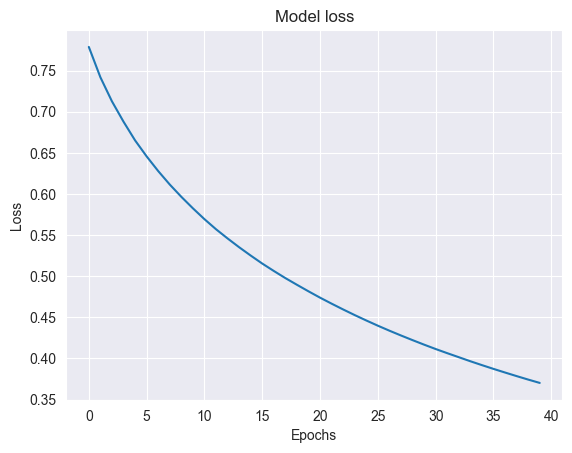

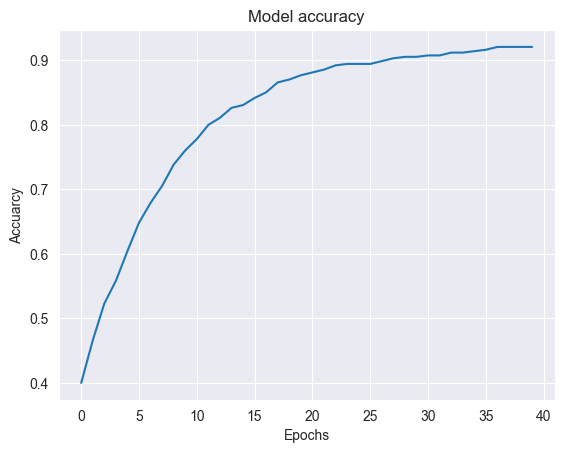

In [198]:
plt.plot(ann1_hist_adagrad.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist_adagrad.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [199]:
y_pred_adagrad = get_pred_labels(ann1_adagrad, X_test)

4/4 [==============================] - 0s 871us/step


In [200]:
y_pred_adagrad

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

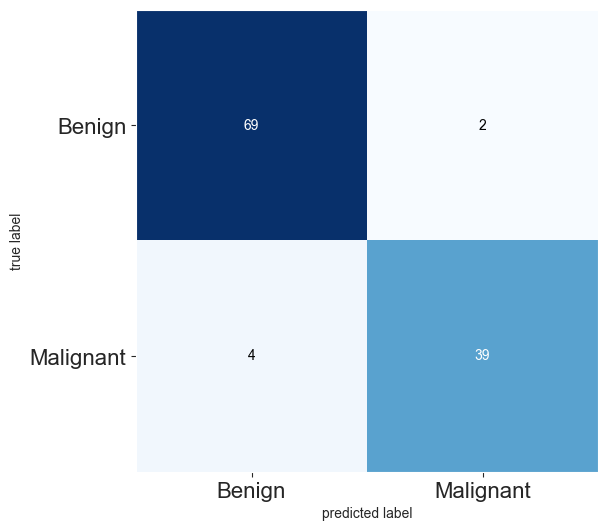

In [201]:
show_conf_matrix(y_pred_adagrad)


In [202]:
acc1_adagrad = accuracy_score(y_test.astype(int), y_pred_adagrad.astype(int))
acc1_adagrad

0.9473684210526315

In [203]:
print(classification_report(y_test.astype(int), y_pred_adagrad.astype(int)))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## ANN2 Adagrad

In [204]:
ann2_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [205]:
ann2_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [206]:
ann2_adagrad_hist = ann2_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 613us/step - loss: 0.7418 - accuracy: 0.5077
Epoch 2/100
15/15 [==============================] - 0s 525us/step - loss: 0.6947 - accuracy: 0.5890
Epoch 3/100
15/15 [==============================] - 0s 579us/step - loss: 0.6545 - accuracy: 0.6527
Epoch 4/100
15/15 [==============================] - 0s 538us/step - loss: 0.6281 - accuracy: 0.6681
Epoch 5/100
15/15 [==============================] - 0s 530us/step - loss: 0.5856 - accuracy: 0.6945
Epoch 6/100
15/15 [==============================] - 0s 521us/step - loss: 0.5601 - accuracy: 0.7297
Epoch 7/100
15/15 [==============================] - 0s 501us/step - loss: 0.5565 - accuracy: 0.7429
Epoch 8/100
15/15 [==============================] - 0s 429us/step - loss: 0.5501 - accuracy: 0.7692
Epoch 9/100
15/15 [==============================] - 0s 458us/step - loss: 0.5140 - accuracy: 0.7934
Epoch 10/100
15/15 [==============================] - 0s 417us/step - loss: 0.5031 - accura

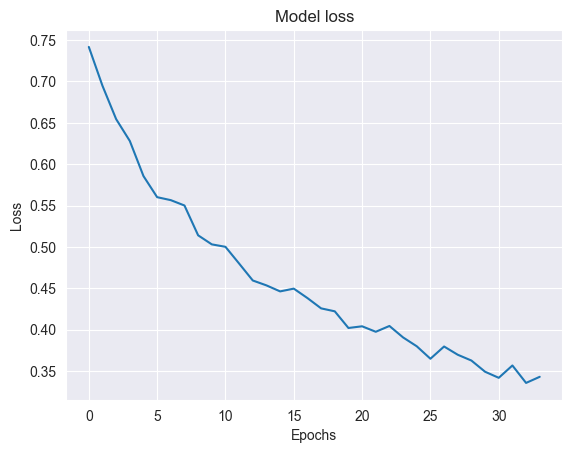

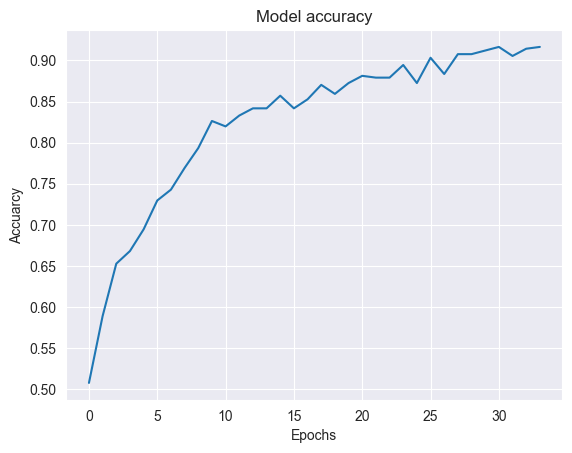

In [207]:
plt.plot(ann2_adagrad_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_adagrad_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [208]:
y_pred2_adagrad = get_pred_labels(ann2_adagrad, X_test)

4/4 [==============================] - 0s 786us/step


<Figure size 640x480 with 0 Axes>

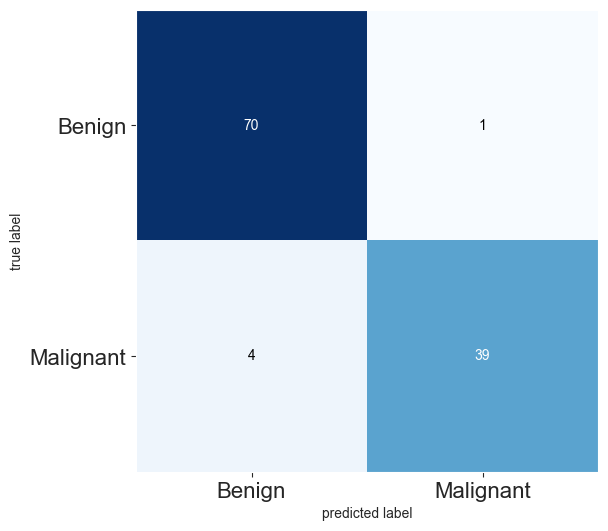

In [209]:
show_conf_matrix(y_pred2_adagrad)

In [210]:
acc2_adagrad = accuracy_score(y_test.astype(int), y_pred2_adagrad.astype(int))
acc2_adagrad

0.956140350877193

In [211]:
print(classification_report(y_test.astype(int), y_pred2_adagrad.astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## ANN3 Adagrad

In [212]:
ann3_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [213]:
ann3_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [214]:
ann3_adagrad_hist = ann3_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 574us/step - loss: 0.6636 - accuracy: 0.6593
Epoch 2/100
15/15 [==============================] - 0s 629us/step - loss: 0.6485 - accuracy: 0.7319
Epoch 3/100
15/15 [==============================] - 0s 583us/step - loss: 0.6345 - accuracy: 0.7714
Epoch 4/100
15/15 [==============================] - 0s 507us/step - loss: 0.6208 - accuracy: 0.8154
Epoch 5/100
15/15 [==============================] - 0s 488us/step - loss: 0.6073 - accuracy: 0.8374
Epoch 6/100
15/15 [==============================] - 0s 554us/step - loss: 0.5940 - accuracy: 0.8703
Epoch 7/100
15/15 [==============================] - 0s 856us/step - loss: 0.5809 - accuracy: 0.8835
Epoch 8/100
15/15 [==============================] - 0s 470us/step - loss: 0.5674 - accuracy: 0.8857
Epoch 9/100
15/15 [==============================] - 0s 526us/step - loss: 0.5534 - accuracy: 0.8923
Epoch 10/100
15/15 [==============================] - 0s 530us/step - loss: 0.5401 - accura

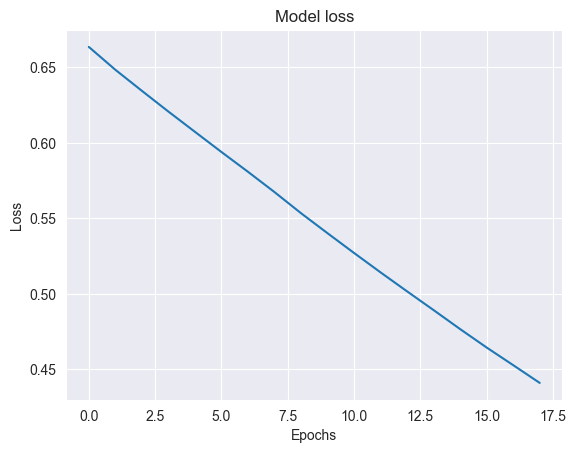

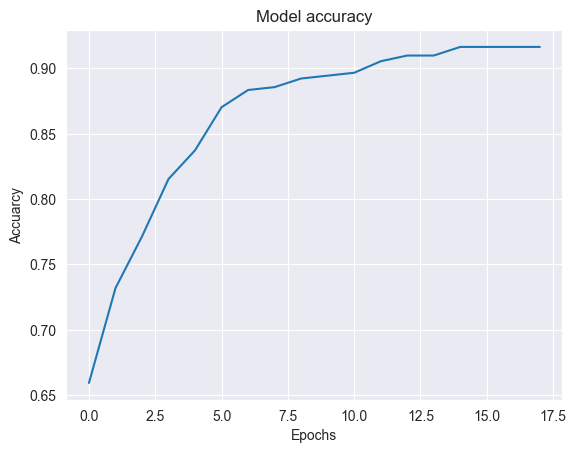

In [215]:
plt.plot(ann3_adagrad_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_adagrad_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [216]:
y_pred3_adagrad = get_pred_labels(ann3_adagrad, X_test)

4/4 [==============================] - 0s 4ms/step


<Figure size 640x480 with 0 Axes>

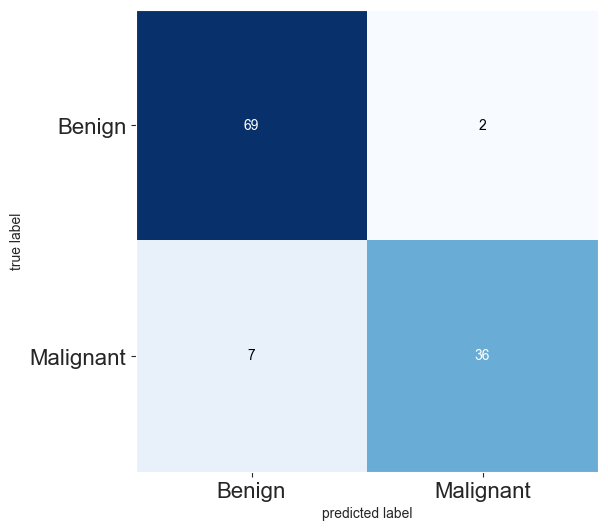

In [217]:
show_conf_matrix(y_pred3_adagrad)

In [218]:
acc3_adagrad = accuracy_score(y_test.astype(int), y_pred3_adagrad.astype(int))
acc3_adagrad

0.9210526315789473

In [219]:
print(classification_report(y_test.astype(int), y_pred3_adagrad.astype(int)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        71
           1       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



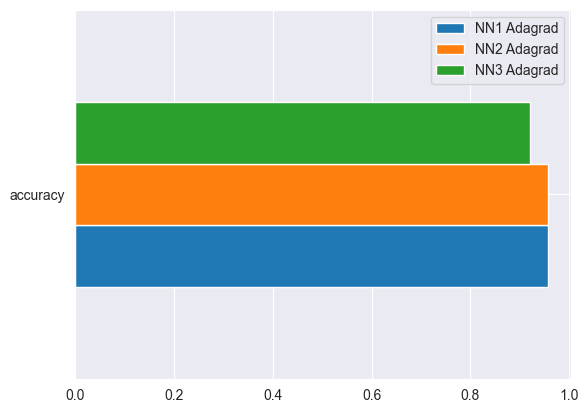

In [220]:
model_scores = {
    'NN1 Adagrad': acc1,
    'NN2 Adagrad': acc2_adagrad,
    'NN3 Adagrad': acc3_adagrad
}
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot(kind='barh',);

## 3. ANNS Using "rmsprop" Optimiser

## ANN1 rmsprop

In [221]:
ann1_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])


In [222]:
ann1_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [223]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)

In [224]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist_rmsprop = ann1_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 594us/step - loss: 0.5734 - accuracy: 0.6923
Epoch 2/100
15/15 [==============================] - 0s 617us/step - loss: 0.3607 - accuracy: 0.9187
Epoch 3/100
15/15 [==============================] - 0s 509us/step - loss: 0.2496 - accuracy: 0.9473
Epoch 4/100
15/15 [==============================] - 0s 508us/step - loss: 0.1784 - accuracy: 0.9582
Epoch 5/100
15/15 [==============================] - 0s 562us/step - loss: 0.1352 - accuracy: 0.9582
Epoch 6/100
15/15 [==============================] - 0s 506us/step - loss: 0.1099 - accuracy: 0.9648
Epoch 7/100
15/15 [==============================] - 0s 488us/step - loss: 0.0945 - accuracy: 0.9736
Epoch 8/100
15/15 [==============================] - 0s 419us/step - loss: 0.0836 - accuracy: 0.9758
Epoch 9/100
15/15 [==============================] - 0s 446us/step - loss: 0.0746 - accuracy: 0.9780
Epoch 10/100
15/15 [==============================] - 0s 433us/step - loss: 0.0679 - accura

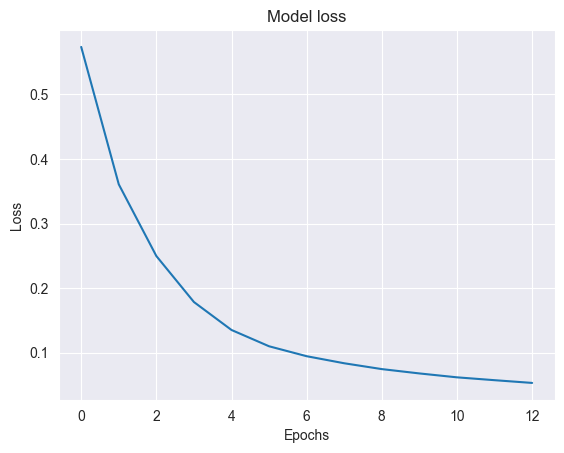

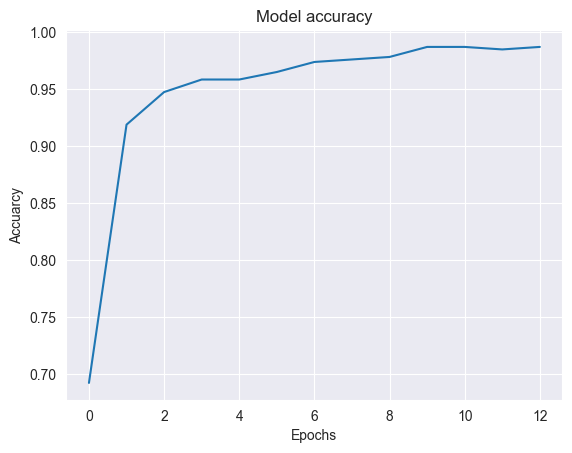

In [225]:
#EVALUATING

plt.plot(ann1_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [226]:
y_pred_rmsprop = get_pred_labels(ann1_rmsprop, X_test)

y_pred_rmsprop

4/4 [==============================] - 0s 747us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

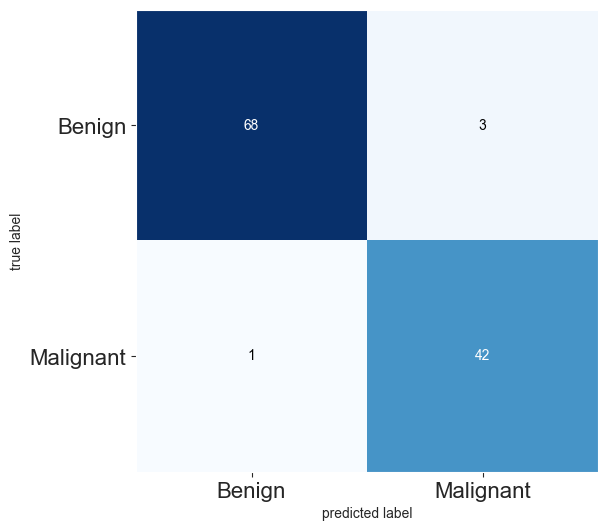

In [227]:
show_conf_matrix(y_pred_rmsprop)

In [228]:
acc1_rmsprop = accuracy_score(y_test.astype(int), y_pred_rmsprop.astype(int))
acc1_rmsprop

0.9649122807017544

In [229]:
print(classification_report(y_test.astype(int), y_pred_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## ANN2 rmsprop

In [230]:
ann2_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [231]:
ann2_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [232]:
ann2_hist_rmsprop = ann2_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 599us/step - loss: 0.5878 - accuracy: 0.7011
Epoch 2/100
15/15 [==============================] - 0s 582us/step - loss: 0.4137 - accuracy: 0.8505
Epoch 3/100
15/15 [==============================] - 0s 576us/step - loss: 0.3259 - accuracy: 0.8989
Epoch 4/100
15/15 [==============================] - 0s 579us/step - loss: 0.2608 - accuracy: 0.9253
Epoch 5/100
15/15 [==============================] - 0s 586us/step - loss: 0.2121 - accuracy: 0.9297
Epoch 6/100
15/15 [==============================] - 0s 564us/step - loss: 0.1739 - accuracy: 0.9495
Epoch 7/100
15/15 [==============================] - 0s 511us/step - loss: 0.1570 - accuracy: 0.9538
Epoch 8/100
15/15 [==============================] - 0s 431us/step - loss: 0.1280 - accuracy: 0.9626
Epoch 9/100
15/15 [==============================] - 0s 526us/step - loss: 0.1229 - accuracy: 0.9626
Epoch 10/100
15/15 [==============================] - 0s 472us/step - loss: 0.1095 - accura

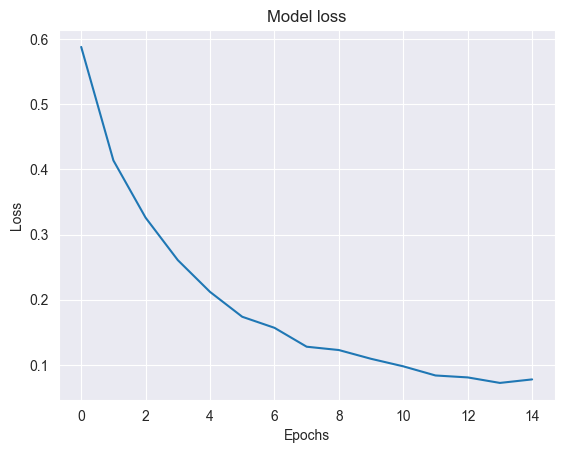

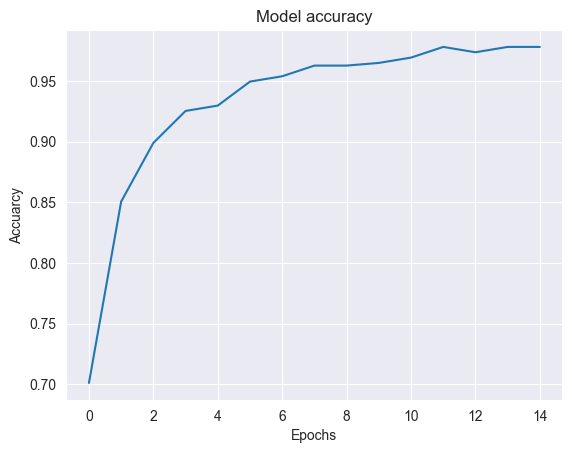

In [233]:
plt.plot(ann2_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [234]:
y_pred2_rmsprop = get_pred_labels(ann2_rmsprop, X_test)

4/4 [==============================] - 0s 810us/step


<Figure size 640x480 with 0 Axes>

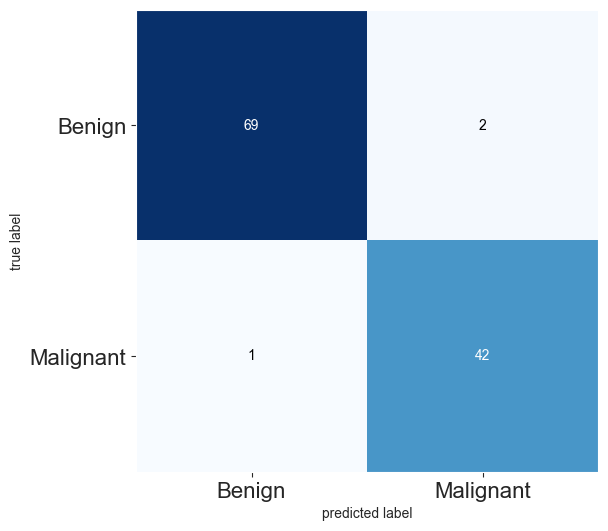

In [235]:
show_conf_matrix(y_pred2_rmsprop)

In [236]:
acc2_rmsprop = accuracy_score(y_test.astype(int), y_pred2_rmsprop.astype(int))
acc2_rmsprop

0.9736842105263158

In [237]:
print(classification_report(y_test.astype(int), y_pred2_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## ANN3 rmsprop

In [238]:
ann3_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [239]:
ann3_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
			
			
ann3_hist_rmsprop = ann3_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 637us/step - loss: 0.4234 - accuracy: 0.8615
Epoch 2/100
15/15 [==============================] - 0s 555us/step - loss: 0.1934 - accuracy: 0.9385
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9538
Epoch 4/100
15/15 [==============================] - 0s 526us/step - loss: 0.1001 - accuracy: 0.9604
Epoch 5/100
15/15 [==============================] - 0s 616us/step - loss: 0.0873 - accuracy: 0.9670
Epoch 6/100
15/15 [==============================] - 0s 563us/step - loss: 0.0753 - accuracy: 0.9714
Epoch 7/100
15/15 [==============================] - 0s 504us/step - loss: 0.0642 - accuracy: 0.9758
Epoch 8/100
15/15 [==============================] - 0s 496us/step - loss: 0.0560 - accuracy: 0.9824
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9868
Epoch 10/100
15/15 [==============================] - 0s 482us/step - loss: 0.0428 - accuracy: 

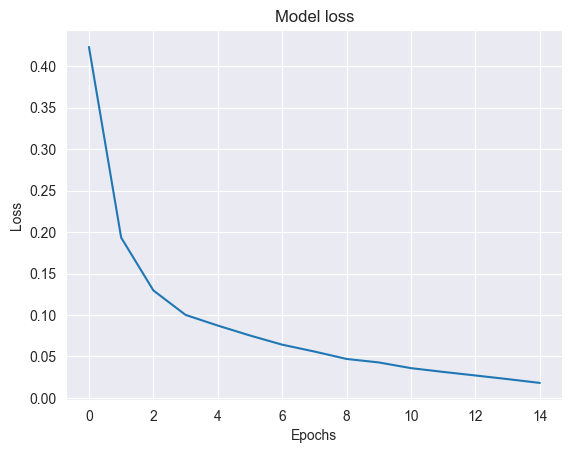

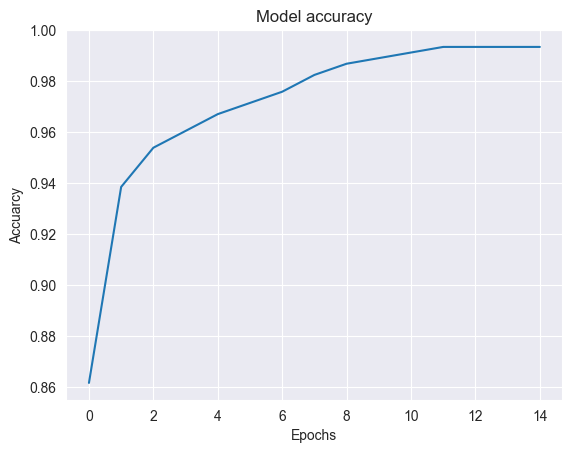

In [240]:
plt.plot(ann3_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [241]:
y_pred3_rmsprop = get_pred_labels(ann3_rmsprop, X_test)

4/4 [==============================] - 0s 854us/step


<Figure size 640x480 with 0 Axes>

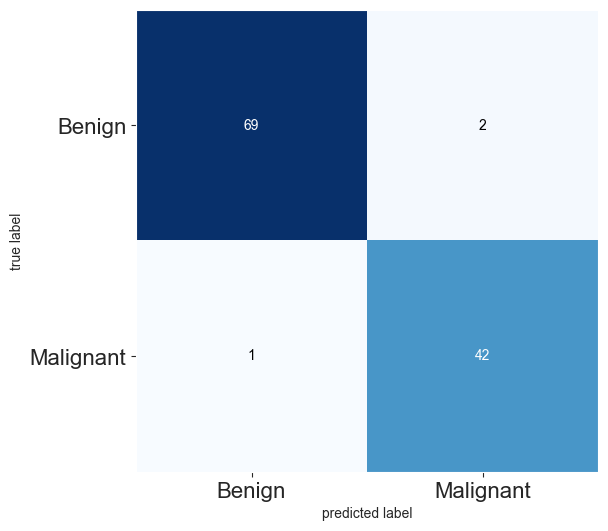

In [242]:
show_conf_matrix(y_pred3_rmsprop)

In [243]:
acc3_rmsprop = accuracy_score(y_test.astype(int), y_pred3_rmsprop.astype(int))
acc3_rmsprop

0.9736842105263158

In [244]:
print(classification_report(y_test.astype(int), y_pred3_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



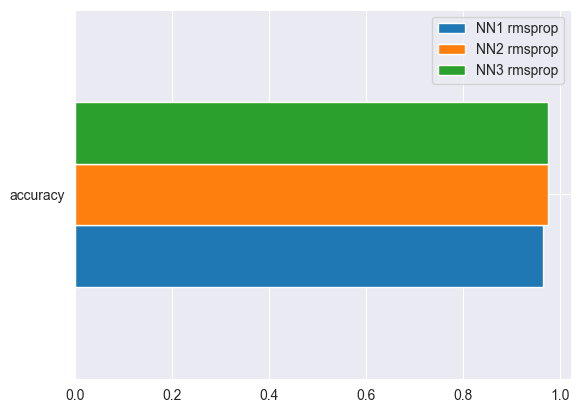

In [245]:
model_scores_rmsprop = {
    'NN1 rmsprop': acc1_rmsprop,
    'NN2 rmsprop': acc2_rmsprop,
    'NN3 rmsprop': acc3_rmsprop
}
model_compare_rmsprop = pd.DataFrame(model_scores_rmsprop, index=["accuracy"])
model_compare_rmsprop.plot(kind='barh',);

## Sopstvena loss funkcija 1

https://www.analyticsvidhya.com/blog/2022/09/dummies-guide-to-writing-a-custom-loss-function-in-tensorflow/

In [246]:
class Custom_CE_Loss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):        
        log_y_pred = tf.math.log(y_pred)
        elements = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
        return tf.reduce_mean(tf.reduce_sum(elements,axis=1))
    
def SelfLossFunction2(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    custom_loss=kb.square(y_true-y_pred)
    return custom_loss

## ANN3 using rmsprop and custom loss

In [247]:
ann3_rmsprop_customloss = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [248]:
ann3_rmsprop_customloss.compile(optimizer='rmsprop',
            loss=SelfLossFunction2,
            metrics=['accuracy'])

In [249]:
ann3_hist_rmsprop_customloss = ann3_rmsprop_customloss.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 593us/step - loss: 0.1686 - accuracy: 0.8264
Epoch 2/100
15/15 [==============================] - 0s 507us/step - loss: 0.0693 - accuracy: 0.9429
Epoch 3/100
15/15 [==============================] - 0s 553us/step - loss: 0.0408 - accuracy: 0.9692
Epoch 4/100
15/15 [==============================] - 0s 484us/step - loss: 0.0280 - accuracy: 0.9758
Epoch 5/100
15/15 [==============================] - 0s 516us/step - loss: 0.0216 - accuracy: 0.9824
Epoch 6/100
15/15 [==============================] - 0s 475us/step - loss: 0.0172 - accuracy: 0.9802
Epoch 7/100
15/15 [==============================] - 0s 506us/step - loss: 0.0176 - accuracy: 0.9780
Epoch 8/100
15/15 [==============================] - 0s 447us/step - loss: 0.0130 - accuracy: 0.9846
Epoch 9/100
15/15 [==============================] - 0s 515us/step - loss: 0.0137 - accuracy: 0.9846
Epoch 10/100
15/15 [==============================] - 0s 451us/step - loss: 0.0113 - accura

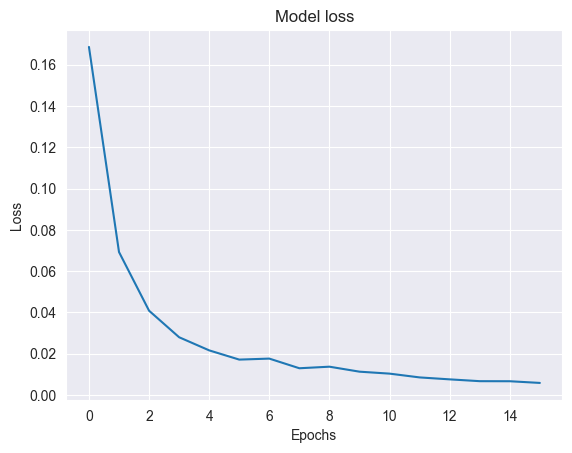

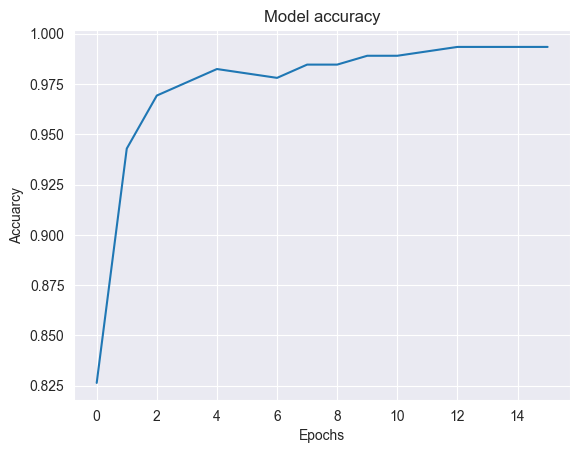

In [250]:
plt.plot(ann3_hist_rmsprop_customloss.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist_rmsprop_customloss.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [251]:
y_pred3_rmsprop_customloss = get_pred_labels(ann3_rmsprop_customloss, X_test)

4/4 [==============================] - 0s 925us/step


<Figure size 640x480 with 0 Axes>

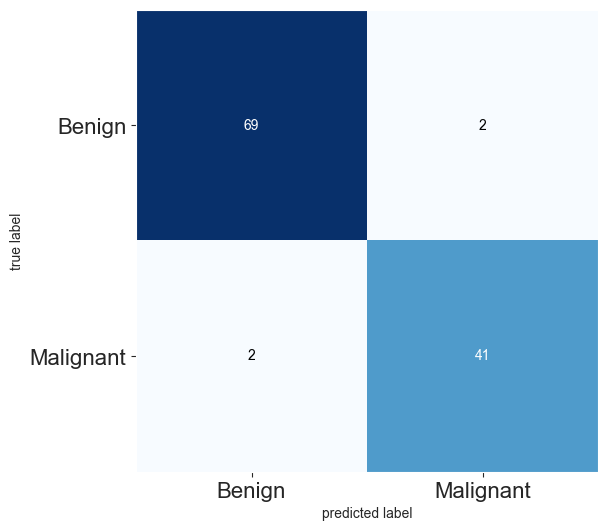

In [252]:
show_conf_matrix(y_pred3_rmsprop_customloss)

In [253]:
acc3_rmsprop_customloss = accuracy_score(y_test.astype(int), y_pred3_rmsprop_customloss.astype(int))
acc3_rmsprop_customloss

0.9649122807017544

In [254]:
print(classification_report(y_test.astype(int), y_pred3_rmsprop_customloss.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



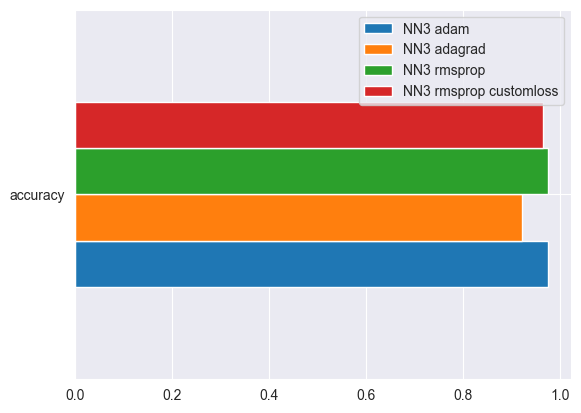

In [255]:
model_scores_anns3 = {
    'NN3 adam': acc3,
    'NN3 adagrad': acc3_adagrad,
    'NN3 rmsprop': acc3_rmsprop,
    'NN3 rmsprop custom loss': acc3_rmsprop_customloss
}
model_compare_rmsprop_anns3 = pd.DataFrame(model_scores_anns3, index=["accuracy"])
model_compare_rmsprop_anns3.plot(kind='barh',);

## Overfitting ANN1

In [345]:
ann_overfitted = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [346]:
ann_overfitted.compile(optimizer='adam',
            loss=tf.keras.losses.MeanAbsoluteError(),
            metrics=['accuracy'])

In [347]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
#                                                  patience=3)
    

X_train_overfitted = np.asarray(X_train).astype('float32')
y_train_overfitted = np.asarray(y_train).astype('float32')

In [348]:
BATCH_SIZE = 32
EPOCHS = 100
ann_hist_overfitted = ann_overfitted.fit(X_train_overfitted, y_train_overfitted, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/100
15/15 [==============================] - 0s 620us/step - loss: 0.3398 - accuracy: 0.8549
Epoch 2/100
15/15 [==============================] - 0s 616us/step - loss: 0.1408 - accuracy: 0.9385
Epoch 3/100
15/15 [==============================] - 0s 531us/step - loss: 0.0797 - accuracy: 0.9473
Epoch 4/100
15/15 [==============================] - 0s 586us/step - loss: 0.0589 - accuracy: 0.9626
Epoch 5/100
15/15 [==============================] - 0s 526us/step - loss: 0.0473 - accuracy: 0.9692
Epoch 6/100
15/15 [==============================] - 0s 563us/step - loss: 0.0378 - accuracy: 0.9758
Epoch 7/100
15/15 [==============================] - 0s 496us/step - loss: 0.0324 - accuracy: 0.9780
Epoch 8/100
15/15 [==============================] - 0s 493us/step - loss: 0.0272 - accuracy: 0.9824
Epoch 9/100
15/15 [==============================] - 0s 588us/step - loss: 0.0238 - accuracy: 0.9846
Epoch 10/100
15/15 [==============================] - 0s 451us/step - loss: 0.0212 - accura

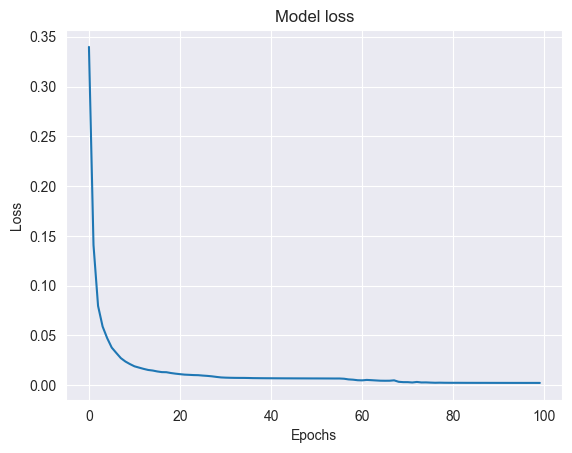

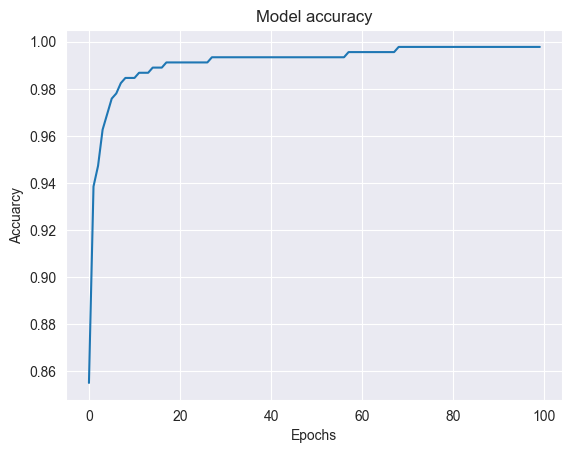

In [349]:
plt.plot(ann_hist_overfitted.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann_hist_overfitted.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [350]:
y_pred_overfitted = get_pred_labels(ann_overfitted, X_test)
y_pred_overfitted

4/4 [==============================] - 0s 825us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

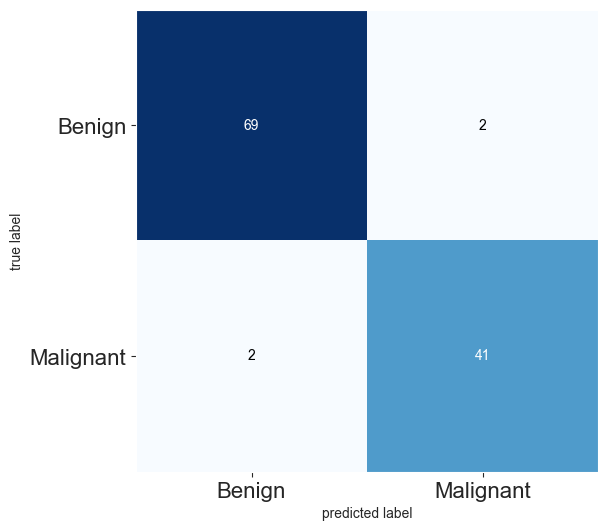

In [351]:
show_conf_matrix(y_pred_overfitted)

In [263]:
acc_overfitted = accuracy_score(y_test.astype(int), y_pred_overfitted.astype(int))
acc_overfitted

0.9736842105263158

In [264]:
print(classification_report(y_test.astype(int), y_pred_overfitted.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## ANN Overfitted using rmsprop optimiser loss + added one more layer + added 50 epochs

In [329]:
ann_overfitted_MAPE = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=10, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [330]:
ann_overfitted_MAPE.compile(optimizer='rmsprop',
            loss=tf.keras.losses.MeanAbsoluteError(),
            metrics=['accuracy'])

In [331]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
#                                                  patience=3)
    

X_train_overfitted_MAPE = np.asarray(X_train).astype('float32')
y_train_overfitted_MAPE = np.asarray(y_train).astype('float32')

In [332]:
BATCH_SIZE = 32
EPOCHS = 150
ann_hist_overfitted_MAPE = ann_overfitted_MAPE.fit(X_train_overfitted_MAPE, y_train_overfitted_MAPE, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/150
15/15 [==============================] - 0s 760us/step - loss: 0.3216 - accuracy: 0.7648
Epoch 2/150
15/15 [==============================] - 0s 799us/step - loss: 0.1423 - accuracy: 0.9363
Epoch 3/150
15/15 [==============================] - 0s 888us/step - loss: 0.0854 - accuracy: 0.9473
Epoch 4/150
15/15 [==============================] - 0s 728us/step - loss: 0.0587 - accuracy: 0.9582
Epoch 5/150
15/15 [==============================] - 0s 805us/step - loss: 0.0444 - accuracy: 0.9670
Epoch 6/150
15/15 [==============================] - 0s 913us/step - loss: 0.0345 - accuracy: 0.9780
Epoch 7/150
15/15 [==============================] - 0s 633us/step - loss: 0.0275 - accuracy: 0.9846
Epoch 8/150
15/15 [==============================] - 0s 709us/step - loss: 0.0230 - accuracy: 0.9824
Epoch 9/150
15/15 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9802
Epoch 10/150
15/15 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 

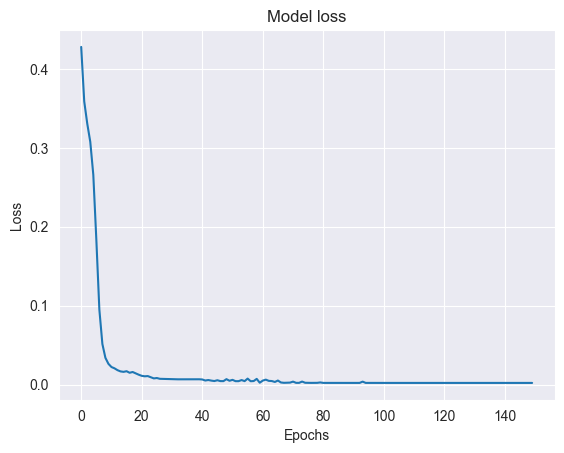

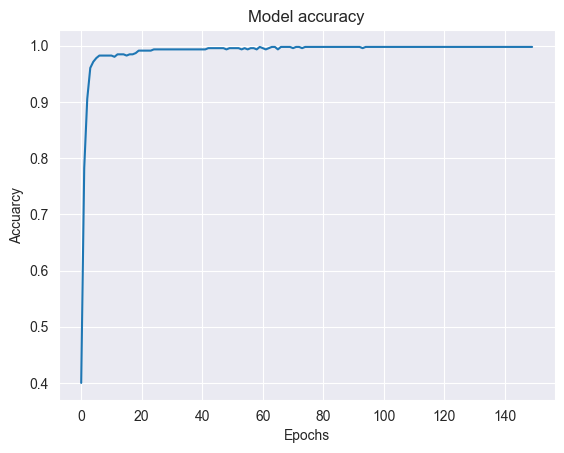

In [269]:
plt.plot(ann_hist_overfitted_MAPE.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann_hist_overfitted_MAPE.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [270]:
y_pred_overfitted_MAPE = get_pred_labels(ann_overfitted_MAPE, X_test)
y_pred_overfitted_MAPE

4/4 [==============================] - 0s 2ms/step


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

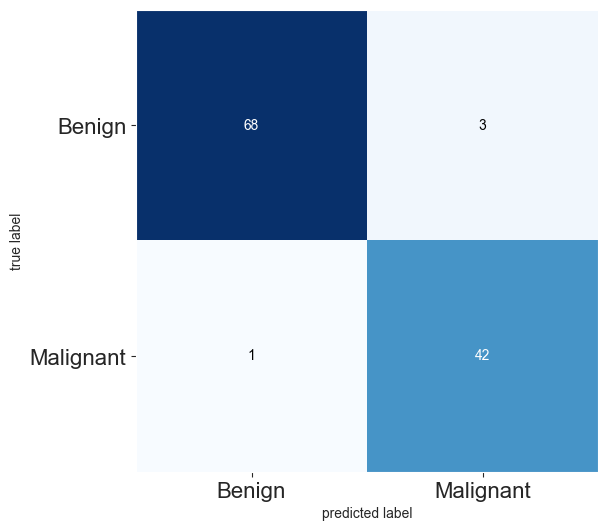

In [271]:
show_conf_matrix(y_pred_overfitted_MAPE)

In [272]:
acc_overfitted_MAPE = accuracy_score(y_test.astype(int), y_pred_overfitted_MAPE.astype(int))
acc_overfitted_MAPE

0.9649122807017544

In [273]:
print(classification_report(y_test.astype(int), y_pred_overfitted_MAPE.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## Upsampling i undersampling koriscenjem algoritama [2]

[2] https://towardsdatascience.com/smote-fdce2f605729

## Gridsearch za optimalan broj layer-a i neurona u layer-u

### Oversampling using SMOTE

<Axes: title={'center': 'Class distribution after applying SMOTE'}, xlabel='label'>

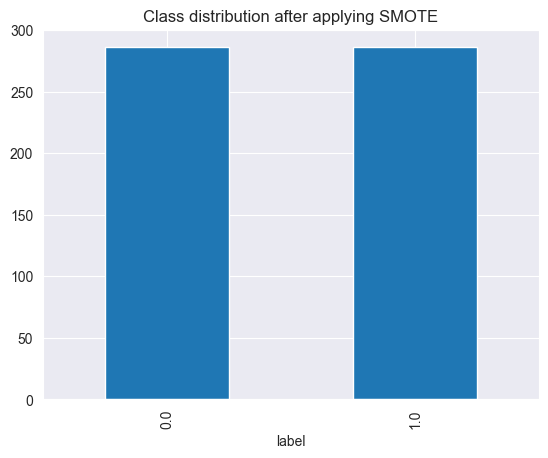

In [352]:
X_oversampled, y_oversampled = SMOTE().fit_resample(X_train, y_train)
pd.Series(y_oversampled).value_counts().plot(kind='bar', title='Class distribution after applying SMOTE', xlabel='buy')

In [287]:
ann_oversampled = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'),  # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer
])
ann_oversampled.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                  patience=3)

In [288]:
BATCH_SIZE = 32
EPOCHS = 100
ann_oversampled_hist = ann_oversampled.fit(X_oversampled, y_oversampled, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
18/18 [==============================] - 0s 641us/step - loss: 0.5463 - accuracy: 0.8094
Epoch 2/100
18/18 [==============================] - 0s 585us/step - loss: 0.3544 - accuracy: 0.9161
Epoch 3/100
18/18 [==============================] - 0s 510us/step - loss: 0.2495 - accuracy: 0.9266
Epoch 4/100
18/18 [==============================] - 0s 526us/step - loss: 0.1831 - accuracy: 0.9371
Epoch 5/100
18/18 [==============================] - 0s 580us/step - loss: 0.1399 - accuracy: 0.9528
Epoch 6/100
18/18 [==============================] - 0s 451us/step - loss: 0.1096 - accuracy: 0.9685
Epoch 7/100
18/18 [==============================] - 0s 436us/step - loss: 0.0889 - accuracy: 0.9773
Epoch 8/100
18/18 [==============================] - 0s 504us/step - loss: 0.0754 - accuracy: 0.9808
Epoch 9/100
18/18 [==============================] - 0s 511us/step - loss: 0.0664 - accuracy: 0.9825
Epoch 10/100
18/18 [==============================] - 0s 483us/step - loss: 0.0594 - accura

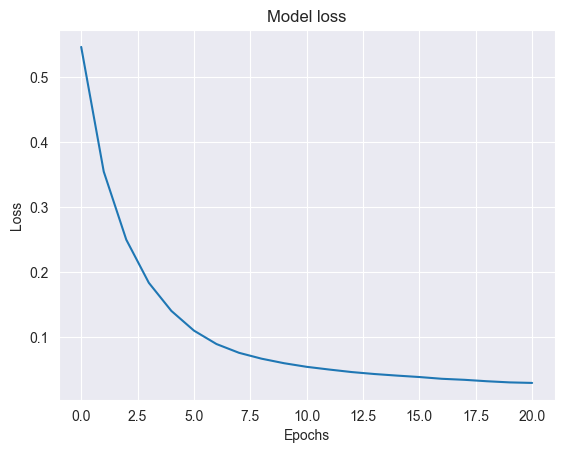

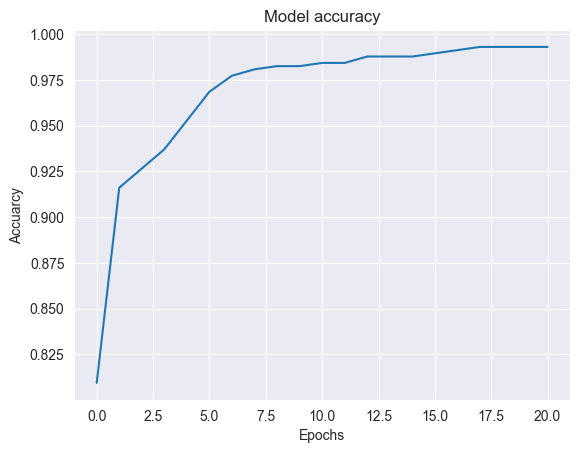

In [289]:
plt.plot(ann_oversampled_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(ann_oversampled_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [290]:
y_pred = get_pred_labels(ann_oversampled, X_test)
y_pred

4/4 [==============================] - 0s 2ms/step


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

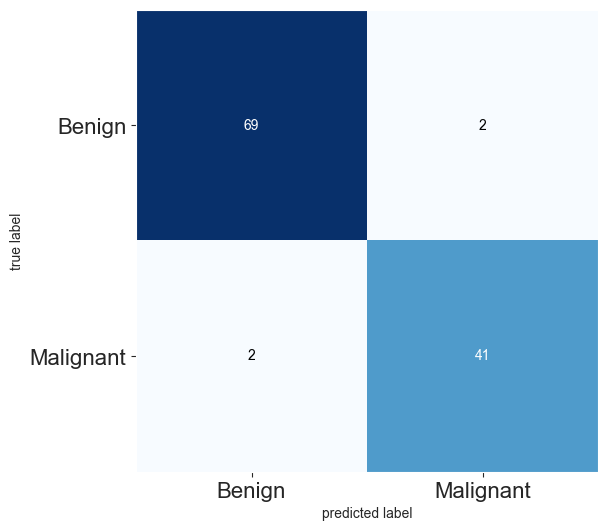

In [291]:
show_conf_matrix(y_pred)

In [292]:
accuracy_score_oversampled = accuracy_score(y_test.astype(int), y_pred.astype(int))
accuracy_score_oversampled

0.9649122807017544

In [293]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

